# Stack Overflow 2020 Survey

There are between 3-5 questions asked, related to the business or real-world context of the data. Each question is answered with an appropriate visualization, table, or statistic.

## Methodology

Project follows the CRISP-DM process outlined for questions through communication. This can be done in the README or the notebook. If a question does not require machine learning, descriptive or inferential statistics should be used to create a compelling answer to a particular question.

### The CRISP-DM Process (Cross Industry Process for Data Mining).
	
1. Business Understanding. Understand the problem. The question.
2. Data Understanding. What do I need to answer my question. This might be a hard question to answer which is why companies tend to collect all data they can and then try to find the answer. 
3. Data Preparation. Gathering  and Wrangling the data. The Wrangling proces is the most time consuming. Many DS problems can be answered just t this stage by using simple data exploration and inference and does not require any fancy modelling.
4. Modelling.
5. Evaluation.



## 1. Businness Understanding

* Question 1 : How is country of residence related to compensation ?  
* Question 2 : Which developper jobs are better paid ?
* Question 3 : Based on level of influence of respondent, which platforms or technologies are more likely to be used in the following years ?
* Question 4 : how does salary relates to working experience as a coder ?
* Question 5 : What features are mostly related to job salary ?


other interestings features : ethnicity , orgsize

## 2. Data Understanding

In [2]:
# Lets import packages 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings   #ignore pandas copy df warnings
warnings.filterwarnings('ignore')

# Read main data to pandas dataframes

df = pd.read_csv('./datasets/stackoverflow/developer_survey_2020/survey_results_public.csv')
schema = pd.read_csv('./datasets/stackoverflow/developer_survey_2020/survey_results_schema.csv')

In [3]:
# lets take a look at the questions and try to formulate new interesting questions ...

def get_question(column_name, schema=schema):
    '''
    
    takes te schema dataframe and the column as a string, and returns a string of the description for that column
    
    INPUT - schema - pandas dataframe with the schema of the developers survey
            column_name - string - the name of the column you would like to know about
    OUTPUT - 
            desc - string - the description of the column
    '''
    desc = schema["QuestionText"].loc[schema['Column'].isin([column_name])].item()

    return desc

# schema

In [4]:
print(get_question('ConvertedComp'))
print(get_question('JobSat'))

Salary converted to annual USD salaries using the exchange rate on 2020-02-19, assuming 12 working months and 50 working weeks.
How satisfied are you with your current job? (If you work multiple jobs, answer for the one you spend the most hours on.)


In [5]:
df.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'Age', 'Age1stCode', 'CompFreq',
       'CompTotal', 'ConvertedComp', 'Country', 'CurrencyDesc',
       'CurrencySymbol', 'DatabaseDesireNextYear', 'DatabaseWorkedWith',
       'DevType', 'EdLevel', 'Employment', 'Ethnicity', 'Gender', 'JobFactors',
       'JobSat', 'JobSeek', 'LanguageDesireNextYear', 'LanguageWorkedWith',
       'MiscTechDesireNextYear', 'MiscTechWorkedWith',
       'NEWCollabToolsDesireNextYear', 'NEWCollabToolsWorkedWith', 'NEWDevOps',
       'NEWDevOpsImpt', 'NEWEdImpt', 'NEWJobHunt', 'NEWJobHuntResearch',
       'NEWLearn', 'NEWOffTopic', 'NEWOnboardGood', 'NEWOtherComms',
       'NEWOvertime', 'NEWPurchaseResearch', 'NEWPurpleLink', 'NEWSOSites',
       'NEWStuck', 'OpSys', 'OrgSize', 'PlatformDesireNextYear',
       'PlatformWorkedWith', 'PurchaseWhat', 'Sexuality', 'SOAccount',
       'SOComm', 'SOPartFreq', 'SOVisitFreq', 'SurveyEase', 'SurveyLength',
       'Trans', 'UndergradMajor', 'WebframeDesireNextYear',
  

In [6]:
# Other corrections
# transform YearsCode and YearsCodePro to numeric
dict_replacements = {
    'Less than 1 year':0, 
    'More than 50 years':50
    }

df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'].replace(dict_replacements))
df['YearsCode'] = pd.to_numeric(df['YearsCode'].replace(dict_replacements))

In [7]:
# df.info()

In [8]:
# print(df.shape)
# df.head(3)

First thoughts :

Question 1 : How is country of residence related to job satisfaction or salary ?

- the proportion of missing values for compensation is 49 % 🤕
- the proportion of missing values for job satisfaction is 29 %

Question 2 : Which developper jobs are better paid ? 

- We will need to separate the values of jobtypes in order to answer this question.

Question 3 : Based on level of influence of respondent, which platforms or technologies are more likely to be used in the following years ?
    
- We could use a mixture of level of influence and platforms wanted in order to answer this question. 

Question 4 : how does salary relates to working experience as a coder ? 
    


In [9]:
# what is the proportion of missing values in our dataset ?


missing_proportions = df.isnull().mean().sort_values()

missing_proportions[1:]


# consider filtering-ou hobby-ists and non-professionals. 
# MainBranch == "I am a developer by profession"


Hobbyist                        0.000698
MainBranch                      0.004638
Country                         0.006035
Employment                      0.009417
NEWSOSites                      0.095965
Age1stCode                      0.101782
YearsCode                       0.105133
EdLevel                         0.109058
LanguageWorkedWith              0.109880
NEWOtherComms                   0.112564
SOVisitFreq                     0.116210
SOAccount                       0.118769
SOComm                          0.123873
OpSys                           0.127721
NEWLearn                        0.128838
NEWStuck                        0.147035
NEWPurpleLink                   0.149827
LanguageDesireNextYear          0.160531
PlatformWorkedWith              0.164720
NEWCollabToolsWorkedWith        0.179612
WelcomeChange                   0.182715
SurveyEase                      0.196382
JobSeek                         0.197546
SurveyLength                    0.197949
UndergradMajor  

count    3.475600e+04
mean     1.037561e+05
std      2.268853e+05
min      0.000000e+00
25%      2.464800e+04
50%      5.404900e+04
75%      9.500000e+04
max      2.000000e+06
Name: ConvertedComp, dtype: float64


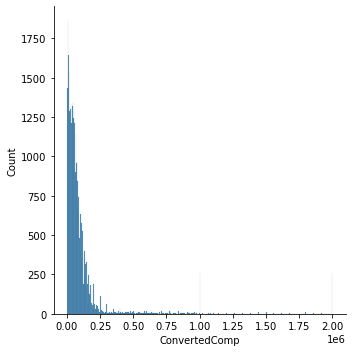

In [11]:
# Analysing our target variables 
print(df['ConvertedComp'].describe())

sns.displot(df['ConvertedComp'])

- Our target value has a proportion of 49% missing values 😩.
- It looks like the min value is zero, and there are a bunch of those. We will filter out those values becuase they dont really help us for now. 
The max 2.0e+06 seems to high to be real. - We might want to dictate an upper limit ourselves for sake of sanity.
  


NameError: name 's' is not defined

Skewness: 0.859152
Kurtosis: 0.125514


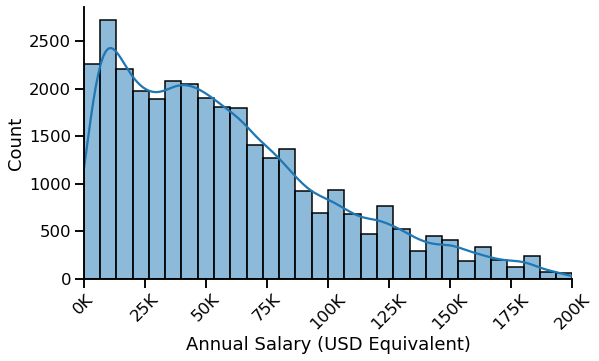

In [45]:
# Drop rows without salary information
df.dropna(subset=["ConvertedComp"], inplace=True)

# filter-out super high salary values (over 200 000 USD per year).
filter_sal = (df['ConvertedComp']>0) & (df['ConvertedComp']<2e+05)


df = df[filter_sal]

sns.set_context('talk')
g = sns.displot(df, x="ConvertedComp", kde=True, bins=30, aspect=1.7)

# g = sns.displot(df, x="ConvertedComp", aspect=1.5, hue="Gender", kind="kde", multiple="stack")

plt.xlabel("Annual Salary (USD Equivalent)")
plt.xticks(rotation=45);

# format annual Salary labels
xlabels = ['{:,.0f}'.format(x) + 'K' for x in g.ax.get_xticks()/1000]
g.set_xticklabels(xlabels)
plt.axis(xmin=0, xmax=200000);

#skewness and kurtosis
print("Skewness: %f" % df['ConvertedComp'].skew())
print("Kurtosis: %f" % df['ConvertedComp'].kurt())

In [19]:
# import OECD minimum wage data for OECD Countries in 2019. source https://en.wikipedia.org/wiki/List_of_minimum_wages_by_country
avg_wage = pd.read_csv('./datasets/oecd_avgwages2019.csv', sep=';')

# Filter only OECD members
df_oecd = df[df['Country'].isin(avg_wage['Country'])]

# Compute a relative salary using the minimum wage of each country
avgwage_dict = avg_wage.set_index('Country').to_dict(orient='dict')['avgWage2019'] 

df_oecd['CountryAvgWage'] = df_oecd['Country'].map(avgwage_dict)
df_oecd['ConvertedCompRel'] = df_oecd['ConvertedComp']/df_oecd['CountryAvgWage']


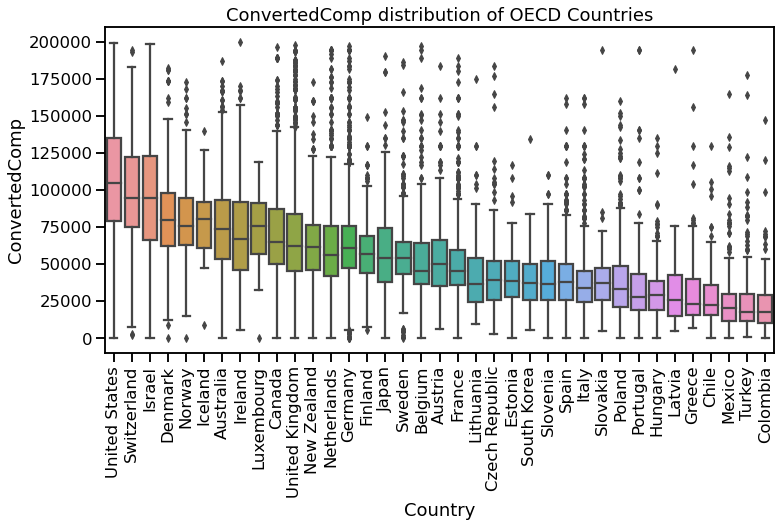

In [112]:
# box plot Country vs Converted Compensation
var = 'Country'
data = pd.concat([df_oecd['ConvertedComp'], df_oecd[var]], axis=1)

sorted_index = df_oecd.groupby('Country')['ConvertedComp'].mean().sort_values(ascending=False).index

f, ax = plt.subplots(figsize=(12,6))
g = sns.boxplot(x=var, y="ConvertedComp", data=data, order=sorted_index)


plt.xticks(rotation=90);
plt.title("ConvertedComp distribution of OECD Countries");

In [107]:
# Getting the point by comparing to country's average weight.
# # box plot Country vs Relative Compensation (using avg wages)
var = 'Country'
data = pd.concat([df_oecd['ConvertedCompRel'], df_oecd[var]], axis=1)

sorted_index = df_oecd.groupby('Country')['ConvertedCompRel'].median().sort_values(ascending=False).index

g = sns.catplot(x=var, y="ConvertedCompRel", data=data, order=sorted_index, kind='box', aspect=2.7, width=0.65)
plt.xticks(rotation=90);
# plt.title("Annual Salary in relation to country Average");
plt.axis(ymax=4);


g.ax.axhline(1, ls='-', c="red", )
g.ax.text(38,1, "wage parity line")


plt.xlabel(None);
plt.ylabel(None);
plt.title("xTimes Annual Earnings (compared to country's average)");


AttributeError: 'Line2D' object has no property 'width'

In [26]:
pd.concat(
    [
        df_oecd.groupby("Country").Respondent.count(),
        df_oecd.groupby('Country')['ConvertedCompRel','ConvertedComp'].mean()
    ], axis=1, 
).sort_values(ascending=False, by='ConvertedCompRel')


,Respondent,ConvertedCompRel,ConvertedComp
Country,,,
Israel,314,2.397601,94472.687898
United States,6837,1.616473,106422.093023
Japan,163,1.508304,58246.190184
Lithuania,115,1.496575,43271.973913
Norway,246,1.490365,80519.926829
Slovakia,100,1.488420,37883.270000
New Zealand,182,1.483228,65308.005495
United Kingdom,2254,1.477900,69795.324312
Ireland,236,1.472311,74336.983051


That seems more realistic. At least 75% of respondants are falling in the range of 0 to 80k USD per year. 
- With a mean falling at 58k, the curve does not follow a normal distribution.
- For the shape of this curve, we might want to consider a transformation later on.
- Shows some degree of peakedness, but we could also argue a bimodal shape here.
 

---

## Question 2 : Which developper job types are better paid ? 

- We will need to separate the values of jobtypes in order to answer this question.

In [51]:
get_question('DevType')

'Which of the following describe you? Please select all that apply.'

there are 23 possible values at feature.


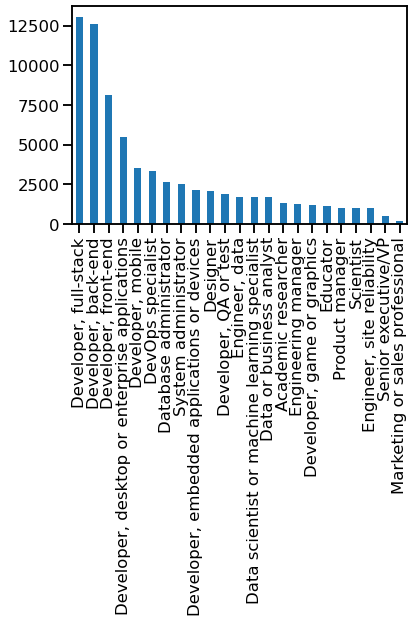

In [52]:
# getting count of all possible devType values

set_possible_values = set()
value_counts = pd.Series()

for row in df_oecd["DevType"].dropna() :
    
    for value in row.split(';'):
        if value not in set_possible_values :
            value_counts[value] = 0 
            set_possible_values.add(value)
    
        value_counts[value] += 1

print('there are {} possible values at feature.'.format(len(set_possible_values)))

value_counts.sort_values(ascending=False).plot(kind='bar');

In [53]:
# one-hot encoding the DevType Column 
df_devtype = pd.concat([df_oecd[['ConvertedComp', 'ConvertedCompRel']], df_oecd['DevType'].str.get_dummies(sep=";")], 1)
df_devtype.shape 

(22807, 25)

In [54]:
%%time
list_rows = []

for col in df_devtype.drop(['ConvertedComp', 'ConvertedCompRel'], axis=1).columns.tolist() : 
    for index, row in df_devtype[df_devtype[col]==1].iterrows():
        vals = [col, row['ConvertedComp'], row['ConvertedCompRel']]
        list_rows.append(vals)

len(list_rows)

df_melt = pd.DataFrame(list_rows, columns=['DevType','ConvertedComp', 'ConvertedCompRel'])

Wall time: 3.95 s


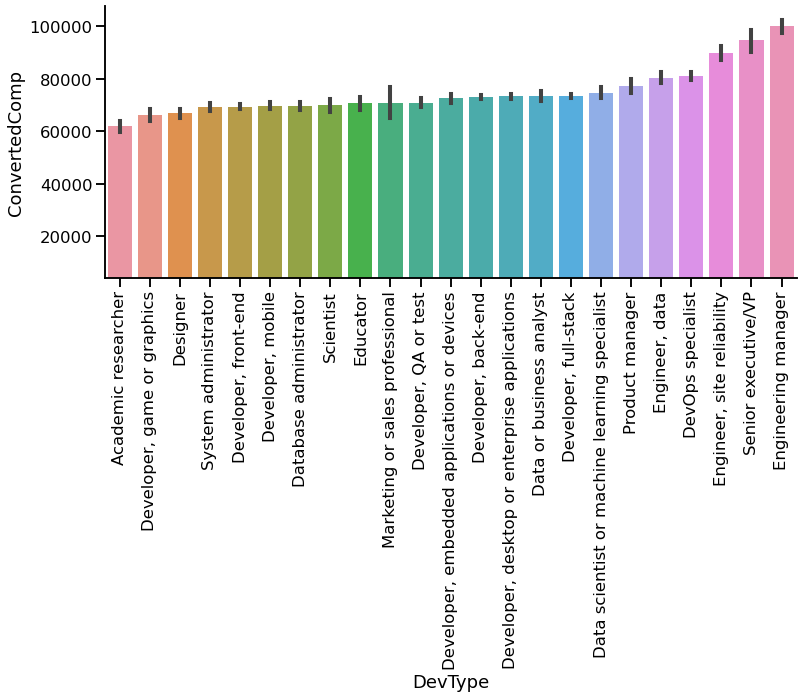

In [55]:

sorted_index = df_melt.groupby("DevType")["ConvertedComp"].mean().sort_values().index

g = sns.catplot(data = df_melt, x='DevType', y='ConvertedComp', order=sorted_index, kind="bar", aspect=2.5)
plt.xticks(rotation=90);
plt.axis(ymin=4000);

Text(0.5, 15.439999999999998, 'x Times Earnings (compared to wage average)')

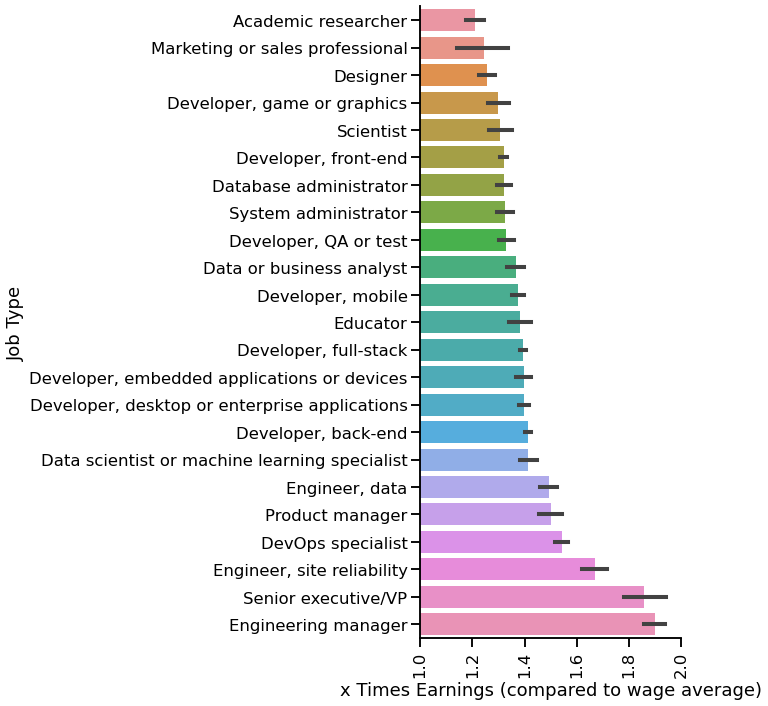

In [62]:
sorted_index = df_melt.groupby("DevType")["ConvertedCompRel"].mean().sort_values().index
g = sns.catplot(data = df_melt, y='DevType', x='ConvertedCompRel', order=sorted_index, kind="bar", height=10)
plt.xticks(rotation=90);
# plt.axis(ymin=1, ymax=2);
plt.axis(xmin=1,xmax=2);
plt.ylabel("Job Type")
plt.xlabel("x Times Earnings (compared to wage average)")

----

In [ ]:
(df['EdLevel'].value_counts()/df.shape[0]).plot(kind="bar");

In [ ]:
df['Country'].value_counts()[:10]

In [ ]:
(df['Country'].value_counts()[:20]/df.shape[0]).plot(kind="bar");

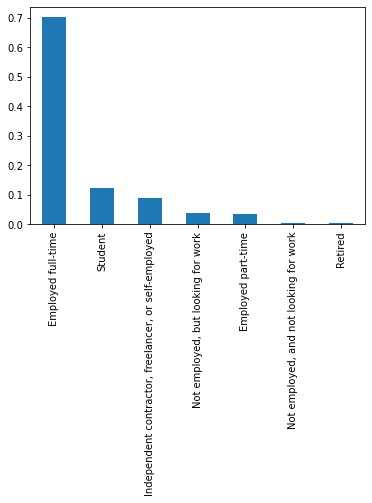

In [13]:

(df['Employment'].value_counts()/df.shape[0]).plot(kind="bar");

In [14]:
# we will definetively need to split this.
len(df['DevType'].value_counts())



8269

'Which of the following describe you? Please select all that apply.'

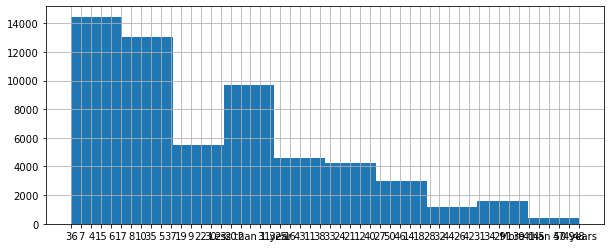

In [17]:
df['YearsCode'].hist(bins=10, figsize=(10,4))